In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
from itertools import combinations
plt.rcParams["figure.figsize"] = 16.0, 13.0
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15
#plt.style.use('seaborn-colorblind')
#sns.set_style("whitegrid", {'xes.edgecolor': '.8',})

In [2]:
plt.style.use('seaborn-white')
print(plt.style.available)

['seaborn-dark-palette', 'Solarize_Light2', 'seaborn-dark', 'seaborn-muted', 'tableau-colorblind10', '_classic_test', 'seaborn-deep', 'bmh', 'seaborn-bright', 'seaborn-notebook', 'dark_background', 'grayscale', 'seaborn-ticks', 'seaborn-darkgrid', 'classic', 'fivethirtyeight', 'ggplot', 'seaborn', 'seaborn-paper', 'seaborn-talk', 'seaborn-colorblind', 'seaborn-whitegrid', 'seaborn-white', 'seaborn-pastel', 'fast', 'seaborn-poster']


In [3]:
df = pd.read_csv("template.csv", sep=",")

In [4]:
df.head(3)

,Identificiation,Sacrifice Age (month),Gender (binary),Gender,Genotype,SIT_Num_Inv,SIT_Num_Ninv,SIT_Num_TOT,TB_Area_SI_(mm^2),TB_Area_SI_NInv_(mm^2),TB_Area_Inv_(mm^2),MTS_SI_Ninv_(mm^2),MTS_SI_Inv_(mm^2),MTS_SI(mm^2),Body Weight (g),Liver weight (g),Liver(g)/Body(g),Spleen weight (g),Spleen (g)/Body (g)
0,Mouse1,9,m,0,X,4,4,8,86,44,42,11,10.5,10.75,30,1.14,0.038000,0.078,0.068421
1,Mouse2,9,m,0,X,3,5,8,78,45,33,9,11,9.75,28,1.07,0.038214,0.086,0.080374
2,Mouse3,9,m,0,X,5,6,11,195,59,136,9.83333333333333,27.2,17.7272727272727,29,0.98,0.033793,0.099,0.101020


# OE Analysis

In [5]:
class Analysis_Swissrolls_MSH2_Nrf2_DKO:
    def __init__(self, columns, genotype, data, test="Mann-Whitney",
                 hue="Sacrifice Age (month)",hue_split=0, loc="inside",
                 genotype_column="Genotype"):
        
        self.genotype_column = genotype_column
        self.genotype = genotype
        self.hue = hue
        self.test = test
        self.columns = columns
        self.data = data
        self.hue_split = hue_split
        self.loc = loc        
        
        liste_box_pairs = []
        
        if self.hue == None:
            for i in range(len(self.genotype)):
                variable = (self.genotype[i])
                liste_box_pairs.append(variable)
        
        elif self.hue != None:
            splitting = self.data[self.hue].tolist()
            splitting_variables = []
            if self.hue_split != None:
                for variable in splitting:
                    if variable not in splitting_variables:
                        splitting_variables.append(variable)
                        
                    else:
                        pass
                    
                for x in range(len(self.genotype)):
                    variable = (self.genotype[x], splitting_variables[self.hue_split])
                    liste_box_pairs.append(variable) 
            
            
            elif self.hue_split == None:
                for variable in splitting:
                    if variable not in splitting_variables:
                        splitting_variables.append(variable)
                    else:
                        pass
                for i in range(len(splitting_variables)):
                    for x in range(len(self.genotype)):
                        box = []
                        variables = (self.genotype[x], splitting_variables[i])
                        liste_box_pairs.append(variables)
                        
            else:
                pass
        else:
            pass
        
        
        box_pairs = list(combinations(liste_box_pairs, 2))
        self.box_pairs = box_pairs
        
    def getbargraph_seaborn(self):
        sns.barplot(x=df[self.genotype_column], y=data[self.columns], hue=self.hue , data=data,
                    ci=68, capsize=.2)
        return plt.show()
    def getstripplot(self):
        sns.stripplot(x=data[self.genotype_column], y=data[self.columns], data=data,
                      hue=self.hue)
        return plt.show()
    def getboxplot(self):
        ax = sns.boxplot(data=self.data, x=self.genotype_column, y=self.columns, hue=self.hue,
                         linewidth=3, palette="Paired")
        add_stat_annotation(ax, data=self.data,x=self.genotype_column, y=self.columns,
                            hue=self.hue, box_pairs=self.box_pairs, text_format="star",
                            test=self.test, loc=self.loc, verbose=5)
        ax.set(xlabel=None)
        ax.set_ylabel(column, fontsize=20)
        # if max(self.data[self.columns].tolist()) > 500:
             #ax.set_yscale('log')
        ax.legend(title=self.hue, title_fontsize="x-large", fontsize="x-large",
                  loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
        # return plt.savefig("/home/felix/Nrf2:MSH2-KO-Project/Plots/" + column, format="tif")
        plt.figure()
    def getswarmplot(self):
        ax = sns.swarmplot(x=data[genotype_column], y=data[column], data=data, color=".25")
        return plt.figure()

Variables you can choose from: 
...........................................................................................
...........................................................................................
...........................................................................................
['Identificiation', 'Sacrifice Age (month)', 'Gender (binary)', 'Gender ', 'Genotype', 'SIT_Num_Inv', 'SIT_Num_Ninv', 'SIT_Num_TOT', 'TB_Area_SI_(mm^2)', 'TB_Area_SI_NInv_(mm^2)', 'TB_Area_Inv_(mm^2)', 'MTS_SI_Ninv_(mm^2)', 'MTS_SI_Inv_(mm^2)', 'MTS_SI(mm^2)', 'Body Weight (g)', 'Liver weight (g)', 'Liver(g)/Body(g)', 'Spleen weight (g)', 'Spleen (g)/Body (g)']
...........................................................................................
...........................................................................................
...........................................................................................
Choose a variable you are interested in: TB_Area_SI_

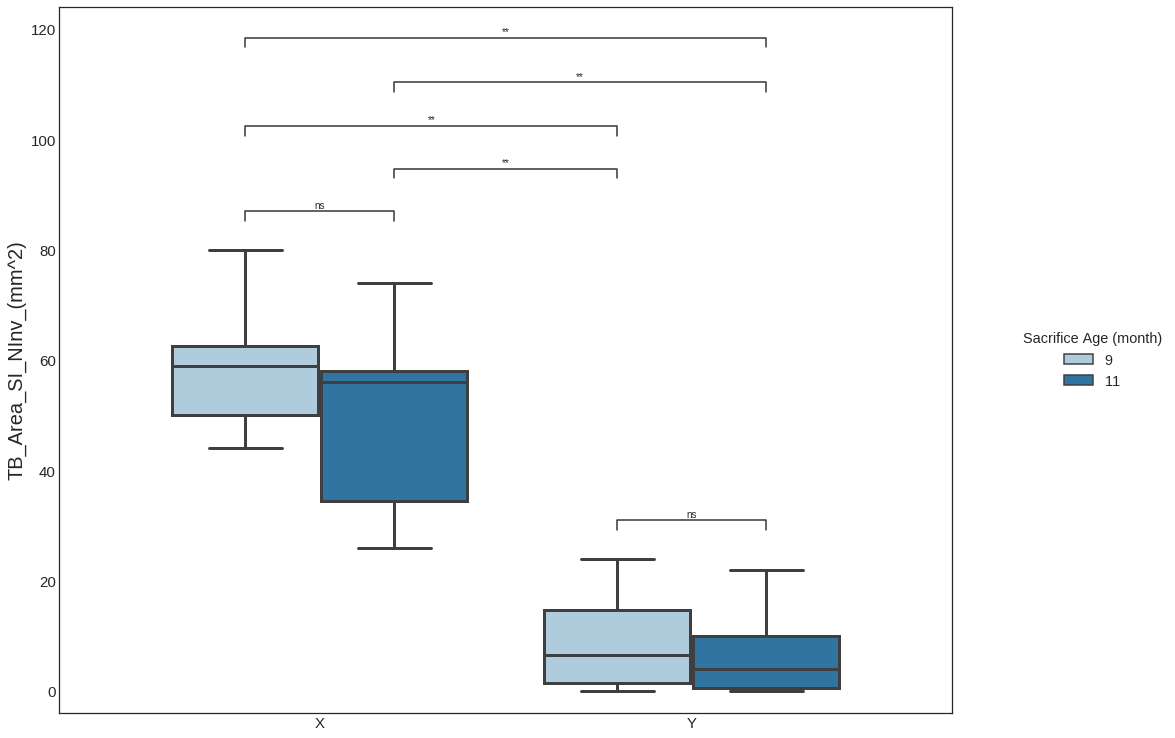

<Figure size 1152x936 with 0 Axes>

In [10]:
print("Variables you can choose from: ")

print("...........................................................................................")
print("...........................................................................................")
print("...........................................................................................")

print(df.columns.tolist())

print("...........................................................................................")
print("...........................................................................................")
print("...........................................................................................")

choice=""
columns = []
while choice != 'quit':
    column = input("Choose a variable you are interested in: ")
    columns.append(column)
    choice=str(input('Would you like to exit?: '))
    if choice =='y' or choice=='ye' or choice=='yes':
        choice='quit'
    elif choice== 'n' or choice=='no':
        pass
    else:
        break

print("Following tests are available: Levenne, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls,")
print("t-test_ind, t-test_welch, t-test_paired, Wilcoxon, Kruskal")           

print("...........................................................................................")
print("...........................................................................................")
print("...........................................................................................")


test = str(input("Which one did you choose?"))
genotypes=["X", "Y"]

for i, column in enumerate(columns):
    plt.figure(i)
    OE = Analysis_Swissrolls_MSH2_Nrf2_DKO(column, genotype=genotypes, data=df, hue_split=None,
                                           test=test)
    OE.getboxplot()